# Linear Regression for House Price Prediction

Objective : To build a machine learning model where we build a linear regression model to predict house prices in Boston 

(Demonstrating Linear Regression)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/housing.csv')
df.head()

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

**About the data:**

RM - average number of rooms per dwelling

LSTAT - % lower status of the population

PTRATIO - pupil-teacher ratio by town

MEDV - Median value of owner-occupied homes in $1000's

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


(this is a simplified dataset and doesn't have all the original columns, all the columns having outliers and null values have been removed)

In [6]:
df.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

In [8]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

**Exploratory data analysis**

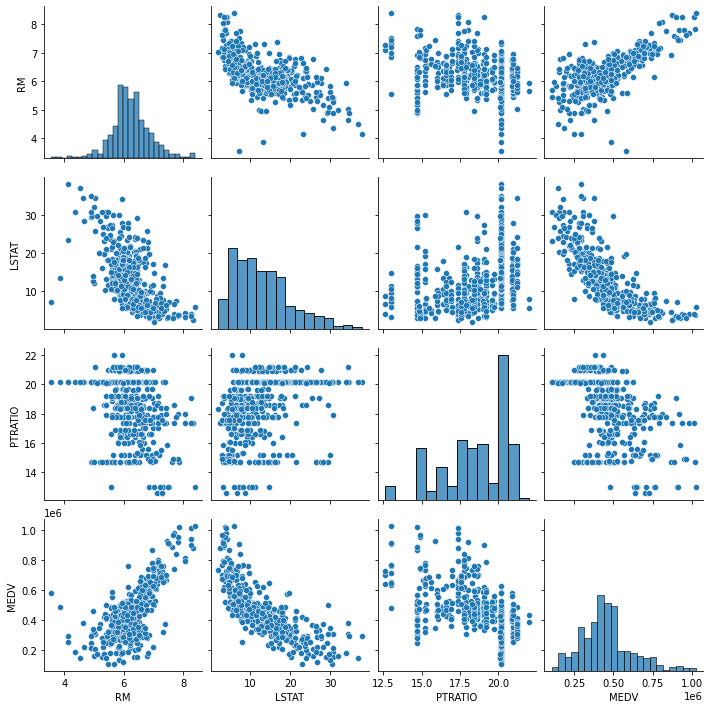

In [7]:
sns.pairplot(df)

**Finding correlation and drawing heatmap**

In [20]:
df.corr()

RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000

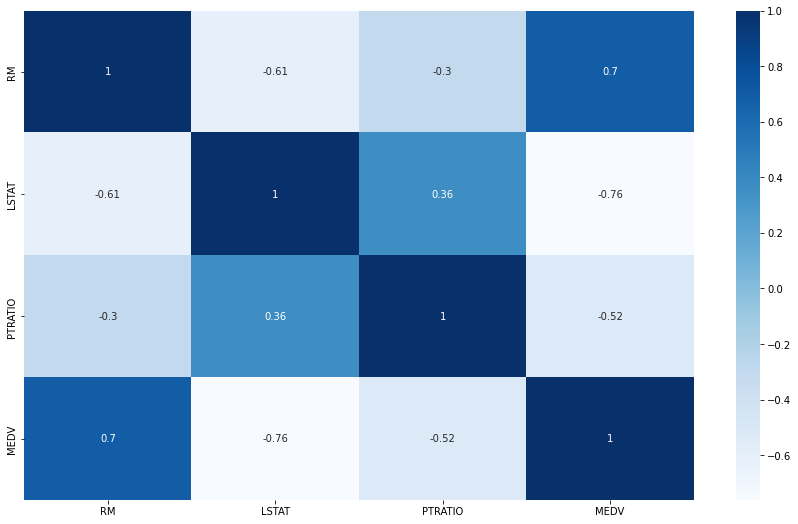

In [21]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

**Regression:**

For applying Linear regression two variables say X and Y, we usually consider X to be independant variable as it is the input we give our model for predicting the value of the output Y. 

**Getting data ready for building the model**

Here our X and Y are also from the dataset.

**X includes : RM,LSTAT, PTRATIO**

X is the features we need to train our model on

**Y includes : MEDV**

Y is the target variable 

we need to predict MEDV based on RM,LSTAT,PTRATIO values






In [9]:
x = df[['RM','LSTAT','PTRATIO']]
y = df['MEDV']

**Split Data into Train, Test data**

Now we will split our dataset into a training set and testing set using sklearn *train_test_split()*. the training set will be going to use for training the model and testing set for testing the model. We are creating a split of 40% testing data and 60% of the training set.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101) 

**test_sizefloat or int, default=None**

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

**random_stateint, RandomState instance or None, default=None**

Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

**Creating and Training the LinearRegression Model**

We will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.

In [11]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression()

**Predictions from our Linear Regression Model**

Letâ€™s find out the predictions of our test set and see how well it perform.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


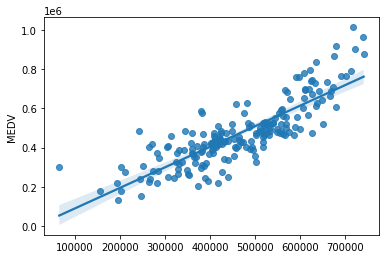

In [17]:
predictions = lm.predict(X_test)  
# plt.scatter(y_test,predictions)
x1=predictions
y1= y_test
sns.regplot(x1,y1)

The above graph indicates:

Our model is pretty accurate since the graph is straight for linear regression 

We can go ahead and calculate the correlation between the variables and also plot them on a heatmap,by doing this we can get the variables on which our prediction is majorly depending on.

